### 5-3-3

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#### 5-3-3-1

In [2]:
def calcPi(x):
    return 4 / (1 + x**2)

In [3]:
integrate.quad(calcPi, 0, 1)

(3.1415926535897936, 3.4878684980086326e-14)

◽︎曲線 y1 を  
$$
\int_{0}^{x}\frac{4}{1+x^2}dx,\ \ 0\leq x \leq 1
$$
で求めてみる：

In [4]:
y1 = np.array([integrate.quad(calcPi, 0, x)[0] for x in np.arange(0, 1.0001, 0.0001)])

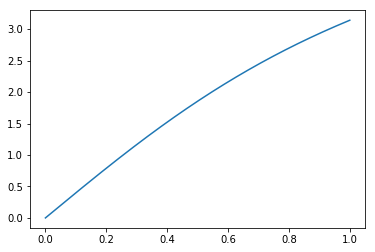

In [5]:
plt.plot(np.arange(0, 1.0001, 0.0001), y1)

#### 5-3-3-2

In [6]:
integrate.quad(np.sin, 0, np.pi)

(2.0, 2.220446049250313e-14)

◽︎ 曲線`y2`を  
$$
\int_{0}^{x}\sin x dx( =-\cos x + 1), \ \ 0 \leq x \leq \pi
$$
で求めてみる。

In [7]:
y2 = np.array([integrate.quad(np.sin, 0, x)[0] for x in np.arange(0, np.pi+0.0001, 0.0001)])

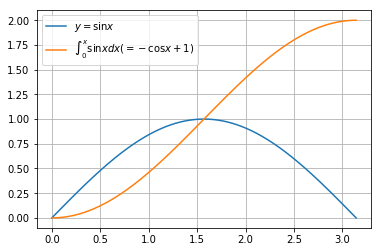

In [8]:
x2 = np.arange(0, np.pi+0.0001, 0.0001)
plt.plot(x2, np.sin(x2))
plt.plot(x2, y2)
plt.legend(['$y=\sin x$', '$\int_{0}^{x}\sin x dx( =-\cos x + 1)$'])
plt.grid()

In [9]:
def I(n):
    return integrate.dblquad(
        lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x : 1, lambda x : np.inf)

In [10]:
I(1)

(1.0000000000048965, 6.360750360104306e-08)

In [11]:
I(2)

(0.4999999999985751, 1.3894083651858995e-08)

In [12]:
I(3)

(0.33333333325010883, 1.3888461883425516e-08)

In [13]:
I(4)

(0.2500000000043577, 1.2983033469368098e-08)

#### 5-3-3-3

In [14]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

In [15]:
def lorenz_func(v, t, p, r, b):
    return [
        -p*v[0] + p*v[1],
        -v[0]*v[2] + r*v[0] - v[1],
        v[0]*v[1] - b*v[2]
    ]

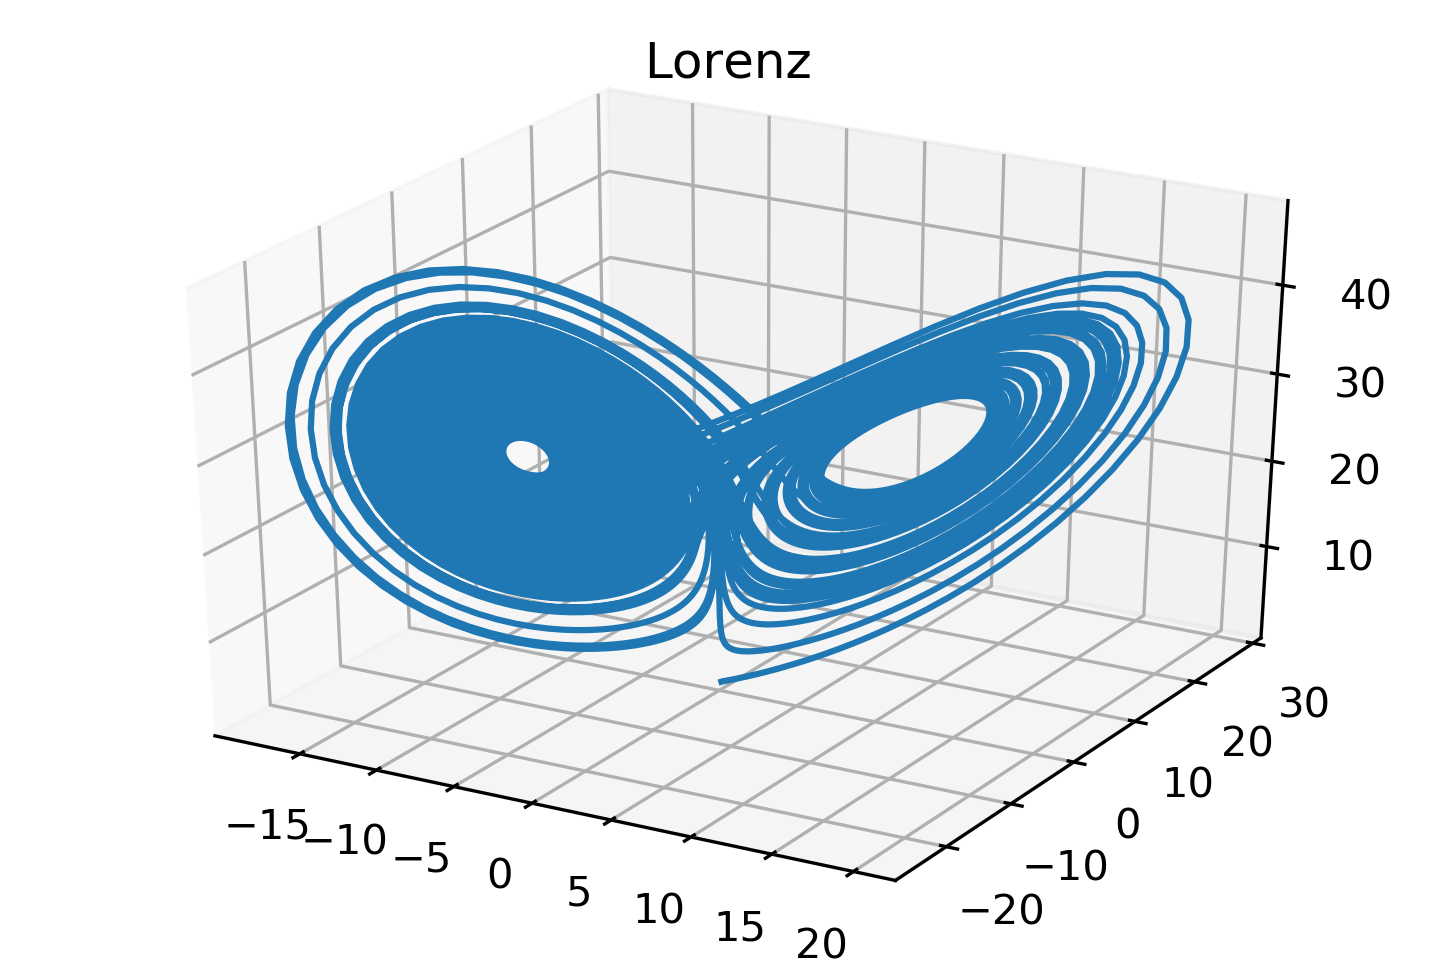

In [16]:
p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

v = odeint(lorenz_func, v0, t, args=(p,r,b))

fig = plt.figure(dpi=300)
ax = fig.gca(projection='3d')
ax.plot(v[:,0], v[:,1], v[:,2])

plt.title('Lorenz')
plt.grid(True)

***
#### Practice 5-15

In [17]:
integrate.quad(lambda x: (x + 1)**2, 0, 2)

(8.666666666666668, 9.621932880084691e-14)

***
#### Practice 5-16

In [18]:
integrate.quad(np.cos, 0, np.pi)

(4.402786869117102e-17, 2.2102239425853306e-14)

***
### 5-3-4

In [20]:
from scipy.optimize import fsolve

#### 5-5-4-1

In [21]:
y = lambda x: 2 * x**2 + 2 * x - 10

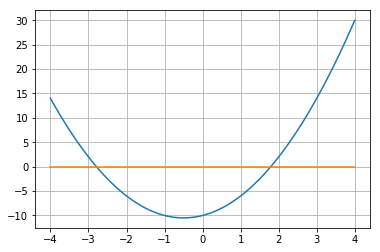

In [25]:
x = np.linspace(-4, 4, 800)
plt.plot(x, y(x))
plt.plot(x, np.zeros(len(x)))
plt.grid()

In [26]:
x1 = fsolve(y, 2)
print(x1)

[1.79128785]


In [27]:
x2 = fsolve(y, -3)
print(x2)

[-2.79128785]


#### 5-3-4-2

In [41]:
from scipy.optimize import minimize

In [42]:
def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2]) + x[2]

In [43]:
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3] - 25.0

In [44]:
def constraint2(x):
    return 40 - (x[0]**2+x[1]**2+x[2]**2+x[3]**2)

In [45]:
x0 = [1, 5, 5, 1]
print(objective(x0))

16


In [46]:
sol = minimize(objective, x0, method='SLSQP',
              bounds=[(1.0, 5.0), (1.0, 5.0), (1.0, 5.0), (1.0, 5.0)],
              constraints=[{'type':'ineq', 'fun':constraint1},
                           {'type':'ineq', 'fun':constraint2}])
print(sol)

     fun: 17.014017245554697
     jac: array([14.57227039,  1.37940788,  2.37940788,  9.56415081])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.74299611, 3.82115461, 1.37940765])


In [48]:
print('最適解')
print(f'y = {sol.fun}')
print(f'x = {sol.x}')

最適解
y = 17.014017245554697
x = [1.         4.74299611 3.82115461 1.37940765]


初期条件を`[np.sqrt(5), np.sqrt(5), np.sqrt(5), np.sqrt(5)]`としてみる：

In [49]:
x00 = [np.sqrt(5), np.sqrt(5), np.sqrt(5), np.sqrt(5)]
print(objective(x00))

35.77708763999664


In [50]:
sol = minimize(objective, x00, method='SLSQP',
              bounds=[(1.0, 5.0), (1.0, 5.0), (1.0, 5.0), (1.0, 5.0)],
              constraints=[{'type':'ineq', 'fun':constraint1},
                           {'type':'ineq', 'fun':constraint2}])
print(sol)

     fun: 17.014017287166684
     jac: array([14.57227468,  1.37940836,  2.37940836,  9.56414986])
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.        , 4.74299972, 3.82114988, 1.37940831])


In [51]:
print('最適解')
print(f'y = {sol.fun}')
print(f'x = {sol.x}')

最適解
y = 17.014017287166684
x = [1.         4.74299972 3.82114988 1.37940831]


****
#### Pracrice 5-17

In [52]:
y5_17 = lambda x: 5*x - 10

In [53]:
x5_17 = np.linspace(-5, 5)

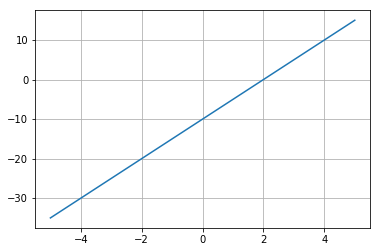

In [56]:
plt.plot(x5_17, y5_17(x5_17))
plt.grid()

In [57]:
x5_17_0 = fsolve(y5_17, 0.5)
print(x5_17_0)

[2.]


***
#### Practice 5-18

In [58]:
y5_18 = lambda x: x**3 - 2*x**2 -11*x + 12

In [59]:
x5_18 = np.linspace(-5, 5)

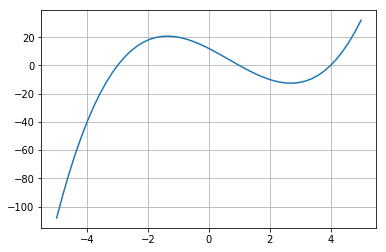

In [60]:
plt.plot(x5_18, y5_18(x5_18))
plt.grid()

In [61]:
x5_18_1 = fsolve(y5_18, 2)
print(x5_18_1)

[1.]


In [62]:
x5_18_2 = fsolve(y5_18, -2)
print(x5_18_2)

[-3.]


In [63]:
x5_18_3 = fsolve(y5_18, 3)
print(x5_18_3)

[4.]
